<a href="https://colab.research.google.com/github/davegbade/Project-2-Machine-Learning.ipynb/blob/main/Project_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2 Part 2



In [78]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

# **Load and inspect the data**

# **First choice: dataset 1**

# **Stroke Prediction Dataset**





**Brief description of the dataset:**

- The dataset is about stroke prediction, which is a serious health issue that affects millions of people worldwide.

- The dataset contains information about 12 variables for each patient, such as gender, age, hypertension, heart disease, ever married, work type, residence
type, average glucose level, body mass index, smoking status and stroke outcome.

- The dataset can be used to train a machine learning model to predict whether a patient is likely to get a stroke based on the input parameters.

- The dataset is from a confidential source and should be used only for educational purposes with proper citation.

**Suggestions for the models appropriate for the dataset:**

stroke prediction dataset, a classification model would be suitable, since the target variable is binary (stroke or no stroke). Some possible classification models are logistic regression, decision tree, random forest, support vector machine, k-nearest neighbors and neural network

In [2]:
# Load the data
#f_path ="/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"
#df = pd.read_csv(f_path)
#df.head()

# **Second choice: dataset 2**

# **Adult income dataset**

**Brief description of the dataset:**

- The dataset is about adult income, which is influenced by various factors such as education level, age, gender, occupation and etc.

- The dataset contains information about 14 variables for each individual, such as age, work class, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, native country and income level.

- The dataset can be used to train a machine learning model to predict whether an individual’s income is above or below 50K based on the input parameters.

- The dataset is from the UCI machine learning repository and has been widely cited in the literature.

**Suggestions for the models appropriate for the dataset:**

For the adult income dataset, a classification model would also be suitable, since the target variable is binary (income above or below 50K). Some possible classification models are the logistic regression, decision tree, random forest, support vector machine, k-nearest neighbors and neural network , or you can also try naive Bayes, gradient boosting or XGBoost.

In [3]:
# Load the data
f_path2 ="/content/drive/MyDrive/Adult Income.csv"
df2 = pd.read_csv(f_path2)
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Display the number of rows and columns for the dataframe
#df.shape
#print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
#print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

In [5]:
# Display the number of rows and columns for the dataframe
df2.shape
print(f'There are {df2.shape[0]} rows, and {df2.shape[1]} columns.')
print(f'The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [6]:
# Display the column names, count of non-null values, and their datatypes
#df.info()

In [7]:
# Display the column names, count of non-null values, and their datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Clean the Data**

**Remove Unnecessary Columns**

In [8]:
#df.drop(columns=['id'], inplace=True)
#df.columns

In [9]:
df2.drop(columns=['fnlwgt'], inplace=True)
df2.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

**Duplicates**

In [10]:
# Display the number of duplicate rows in the dataset
#print(f'There are {df.duplicated().sum()} duplicate rows.')

In [11]:
# Display the number of duplicate rows in the dataset
#print(f'There are {df2.duplicated().sum()} duplicate rows.')

In [12]:
# Drop duplicte rows
df2.drop_duplicates(inplace=True)

In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


**Missing Values**

In [14]:
# Display the total number of missing values
#print(f'There are {df.isna().sum().sum()} missing values.')

In [15]:
# Display the total number of missing values
print(f'There are {df2.isna().sum().sum()} missing values.')

There are 0 missing values.


In [16]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
#df.isna().sum()

We will not need to use SimpleImputer and in our preprocessing steps to impute missing values.

In [17]:
# Check for data types for each column
#df.info()

In [18]:
# Check for data types for each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42468 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              42468 non-null  int64 
 1   workclass        42468 non-null  object
 2   education        42468 non-null  object
 3   educational-num  42468 non-null  int64 
 4   marital-status   42468 non-null  object
 5   occupation       42468 non-null  object
 6   relationship     42468 non-null  object
 7   race             42468 non-null  object
 8   gender           42468 non-null  object
 9   capital-gain     42468 non-null  int64 
 10  capital-loss     42468 non-null  int64 
 11  hours-per-week   42468 non-null  int64 
 12  native-country   42468 non-null  object
 13  income           42468 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


# **Fixing the inconsistence values**

In [19]:
#data_types = df.dtypes
#str_cols = data_types[data_types=='object'].index
#str_cols

In [20]:
#for col in str_cols:
   # print(f'- {col}:')
    #print(df[col].value_counts(dropna=False))
   # print("\n\n")

In [21]:
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [22]:
for col in str_cols:
    print(f'- {col}:')
    print(df2[col].value_counts(dropna=False))
    print("\n\n")

- workclass:
Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       5679
Exec-mana

In [23]:
# Check summary statistics
df2.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,42468.000000,42468.000000,42468.000000,42468.000000,42468.000000
mean,39.476947,10.094801,1226.217128,99.859212,40.650702
std,13.779595,2.658658,7931.500736,429.072095,12.867960
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,38.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


I have to move on with df2 - Adult income Dataset

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
corr_matrix = df2.corr()

<ipython-input-25-28dc6bd3a5be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


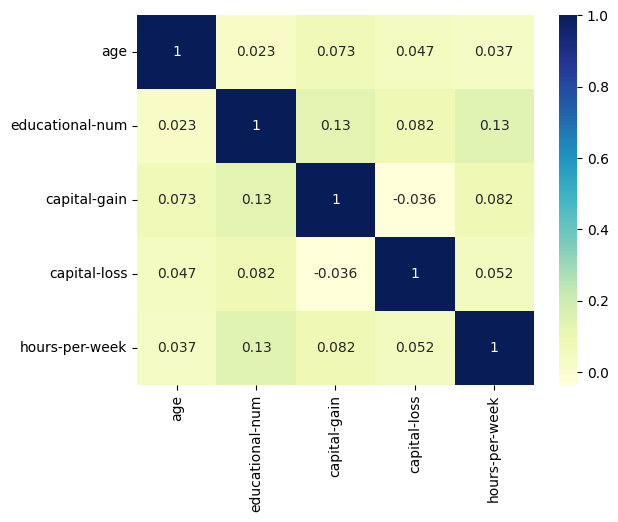

In [26]:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

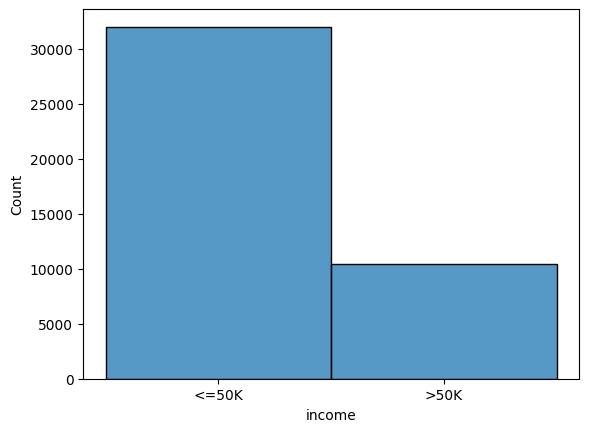

In [27]:
ax = sns.histplot(data = df2, x = 'income')



- More people fall on the income less than or equal 50k, only few people are



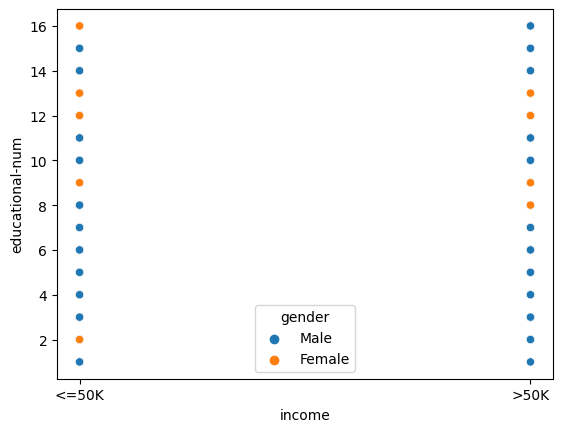

In [28]:
sns.scatterplot(x="income", y="educational-num", hue="gender", data=df2)
plt.show()

# **Visualizations from your analysis**

Scatter Plot shows educational num compare to Gender distribution

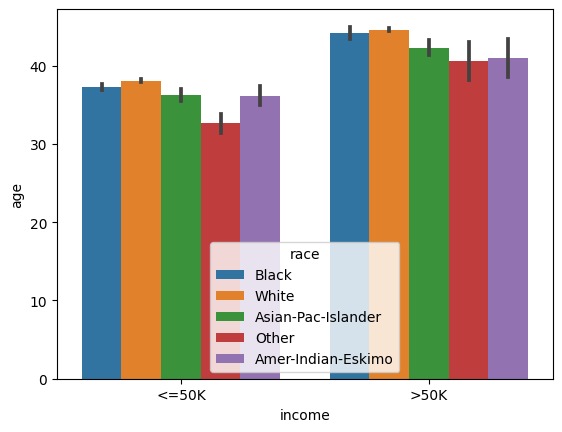

In [29]:
sns.barplot(x="income", y="age", hue="race", data=df2)
plt.show()

- The barplot shows the distribution of income levels across different age groups and races. The x-axis represents the income category, either above or below 50k per year. The y-axis represents the average age of the individuals in each category. The hue represents the race of the individuals, either white, black, Asian or other.

- The barplot reveals that the majority of individuals with income above 50k are more than 40 years old, indicating that higher income is associated with older age. It also shows that white individuals have the highest proportion of income above 50k, followed by black individuals. Assian and other individuals have the lowest proportion of income above 50k, suggesting that there are racial disparities in income distribution.

- The stakeholder can use this information to understand the demographic characteristics of the income groups and to identify potential areas for improvement or intervention. For example, the stakeholder may want to explore the reasons behind the racial gaps in income and to design policies or programs that can promote economic equality and opportunity for all races. Alternatively, the stakeholder may want to target younger individuals with lower income and provide them with education, training or mentoring that can help them increase their earning potential and career prospect

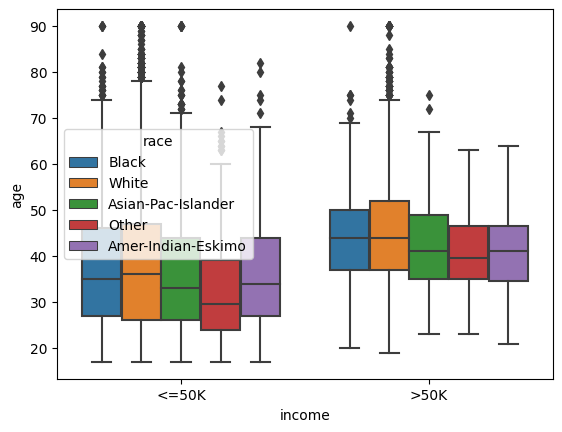

In [30]:
sns.boxplot(x="income", y="age", hue="race", data=df2)
plt.show()

- The boxplot shows the variation of age across different income levels and races. The x-axis represents the income category, either above or below 50k per year. The y-axis represents the age of the individuals in each category. The hue represents the race of the individuals, either white, black, Asian or other.

- The boxplot reveals that the older white individuals have a higher income than the other races, as shown by the higher position and larger size of their box in the above 50k category. This means that they have a higher median age, as well as a wider range of ages, than the other races in the same income group. This could indicate that they work longer or have more experience than the other races, which may contribute to their higher income. It also shows that the younger white individuals have a lower income than the other races, as shown by the lower position and smaller size of their box in the below 50k category. This means that they have a lower median age, as well as a narrower range of ages, than the other races in the same income group. This could indicate that they have less education or skills than the other races, which may limit their income potential.

- The stakeholder can use this information to understand the age variation within and between the income groups and races and to identify potential factors that influence income levels. For example, the stakeholder may want to investigate the role of education, skills, experience, seniority, occupation or industry in determining income and to design policies or programs that can enhance these factors for all races. Alternatively, the stakeholder may want to address the issues of age discrimina

<ipython-input-31-ef195870e2f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


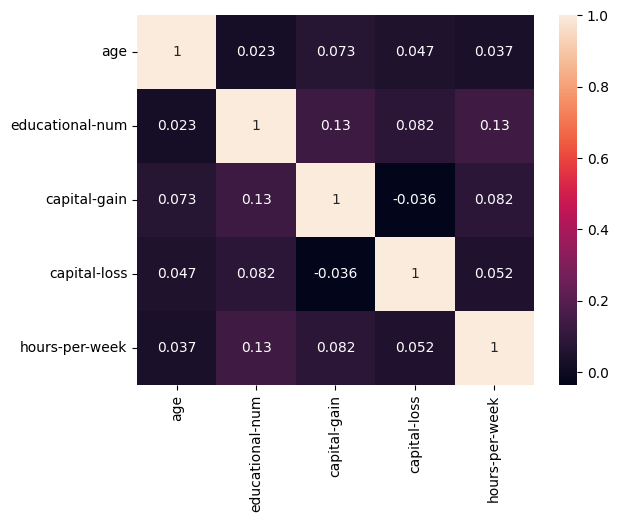

In [31]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [32]:
df2['marital-status']

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48835    Married-civ-spouse
48836         Never-married
48837    Married-civ-spouse
48839               Widowed
48841    Married-civ-spouse
Name: marital-status, Length: 42468, dtype: object

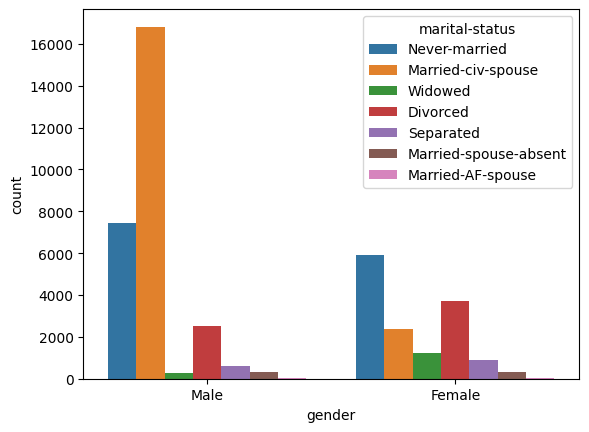

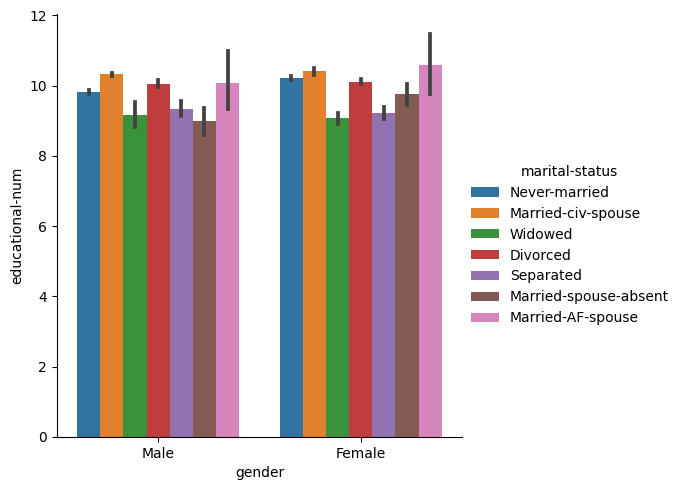

In [33]:
# Use a countplot to show the counts of observations in each category
sns.countplot(x="gender", hue="marital-status", data=df2)

# Or use a catplot with kind="bar" to show the mean of a third numeric variable
sns.catplot(x="gender", y="educational-num", hue="marital-status", data=df2, kind="bar")

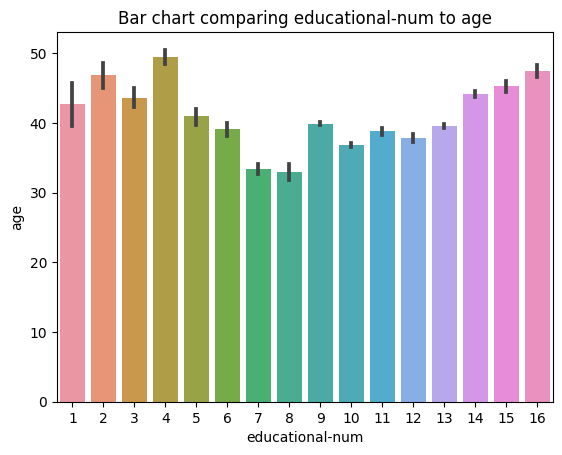

In [34]:

# Import seaborn library
import seaborn as sns

# Plot the bar chart
sns.barplot(x='educational-num', y='age', data=df2)

# Add a label to the graph
plt.title('Bar chart comparing educational-num to age')

# Show the graph
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educational-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

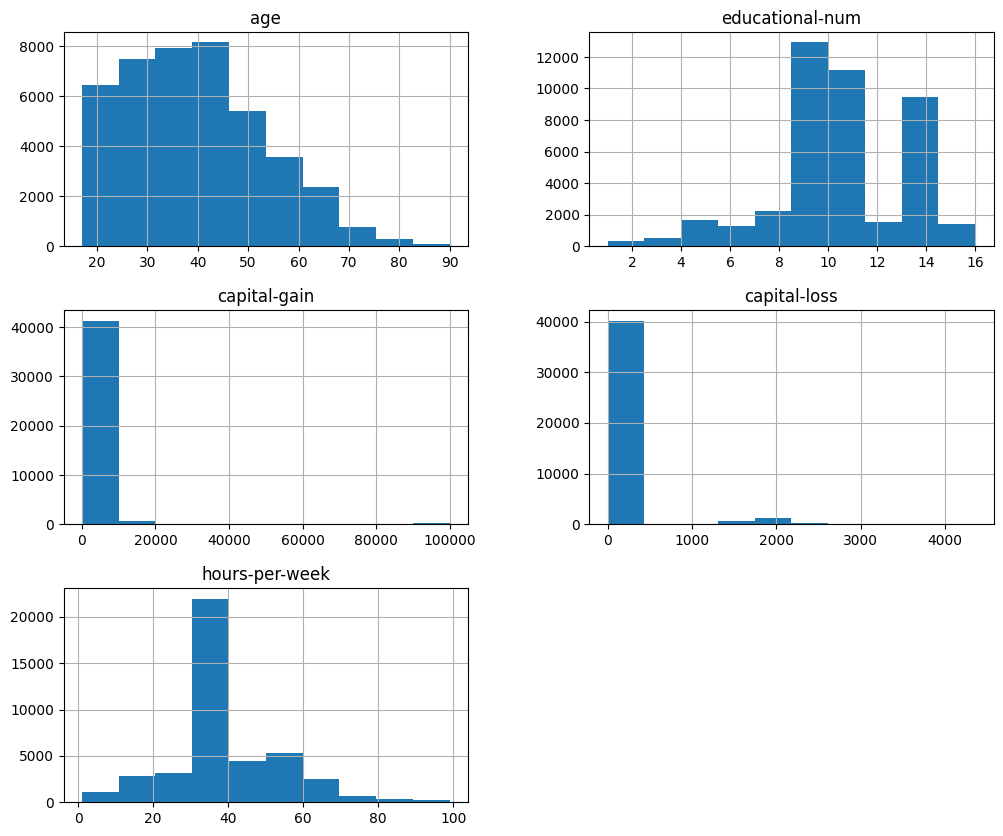

In [35]:
df2.hist(figsize=(12,10))

In [36]:
# Display the column names, count of non-null values, and their datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42468 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              42468 non-null  int64 
 1   workclass        42468 non-null  object
 2   education        42468 non-null  object
 3   educational-num  42468 non-null  int64 
 4   marital-status   42468 non-null  object
 5   occupation       42468 non-null  object
 6   relationship     42468 non-null  object
 7   race             42468 non-null  object
 8   gender           42468 non-null  object
 9   capital-gain     42468 non-null  int64 
 10  capital-loss     42468 non-null  int64 
 11  hours-per-week   42468 non-null  int64 
 12  native-country   42468 non-null  object
 13  income           42468 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [57]:
# Assuming your column is called 'income'
df2['income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

**Split the Data**

In [58]:
# Define features (X) and target (y)
target = 'income'
X = df2.drop(columns = ['income']).copy()
y = df2[target].copy()

In [59]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

**Check Class Balance**

In [60]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.753979
1    0.246021
Name: income, dtype: float64

In [61]:
y_test.value_counts(normalize=True)

0    0.753979
1    0.246021
Name: income, dtype: float64

In [55]:
y_test.value_counts(normalize=True)

<=50K    0.753979
>50K     0.246021
Name: income, dtype: float64

# **Prepare the data appropriately for modeling:**

Create the Pipelines and Tuples for Each Group of Columns
I'm going to divide my data into

- numeric - age, educational-num, capital-gain, capital-loss, hours-per-week
- nominal categorical - workclass, education, marital-status, occupation, relationship, race, gender, native-country
- ordinal categorical columns - No Ordinal cat.
and preprocess each subset differently.

# Numeric

In [62]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [63]:
num_selector(X_train)

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Nominal

In [64]:
# Transformers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
## using constant for demonstration purpose, You can use strategy = 'most_frequest'

#missing_imputer = SimpleImputer(strategy='most_frequest')

missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')


ohe = OneHotEncoder(sparse_output =False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer, ohe)

nominal_cols = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

# Tuple
nominal_tuple = ('Nominal', nom_pipeline, nominal_cols)

In [73]:
# Instantiate the make column transformer

preprocessor = ColumnTransformer([numeric_tuple,
                                       nominal_tuple],
                                              verbose_feature_names_out=False,
                                       remainder='drop')

In [79]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)


ValueError: ignored

In [75]:
# I am using custom function from code along to evaluate the classification metrics

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

In [80]:
# Create an instance of the model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

ValueError: ignored

In [81]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

AttributeError: ignored

In [82]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

AttributeError: ignored

In [83]:
## print the classification reports
labels = ['drugZ','drugQ']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report


NameError: ignored

In [84]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

NameError: ignored

In [85]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[(Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fc9f97020e0>),
                                   ('Nominal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=Fal